In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import missingno as msno
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
os.chdir('C:/Users/saran/Desktop')

In [7]:
data=pd.read_csv('Meteorite_Landings.csv')

In [8]:
data.head()
data = data.rename(columns = {"mass (g)":"mass"}) 

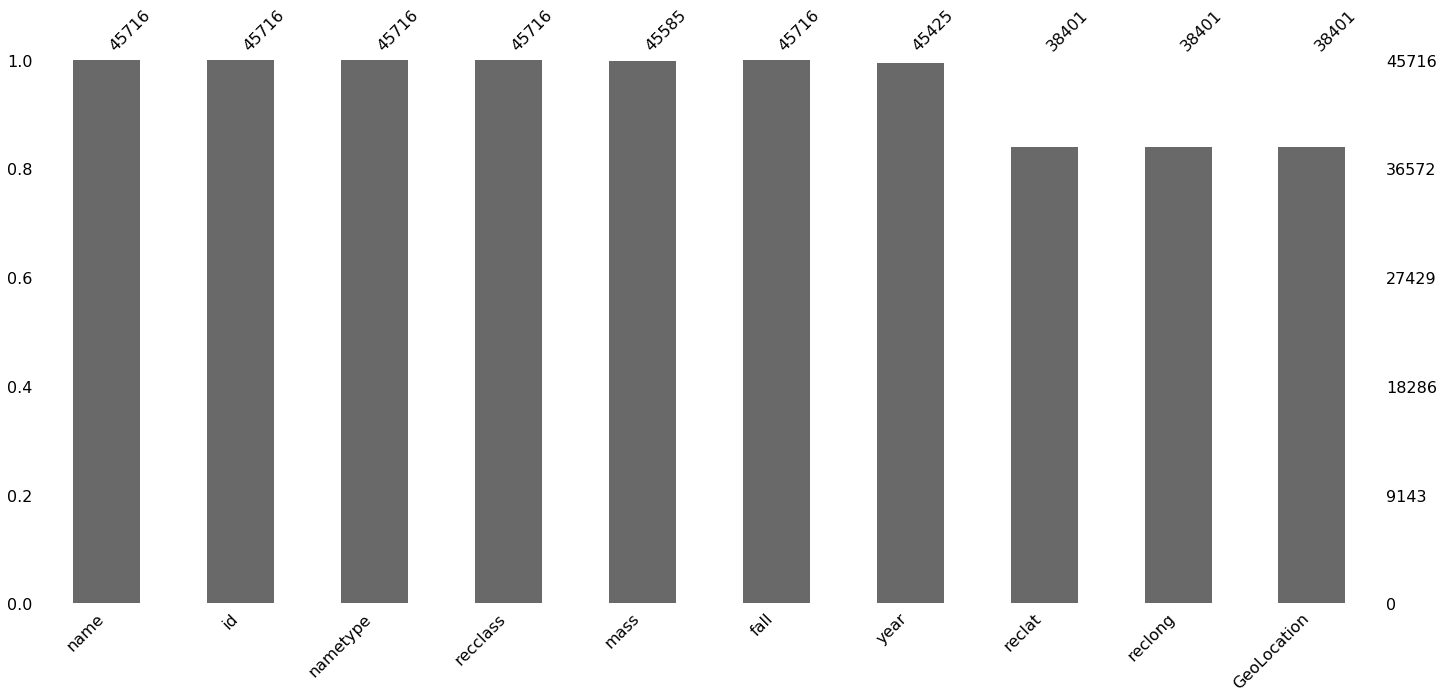

In [9]:
msno.bar(data)

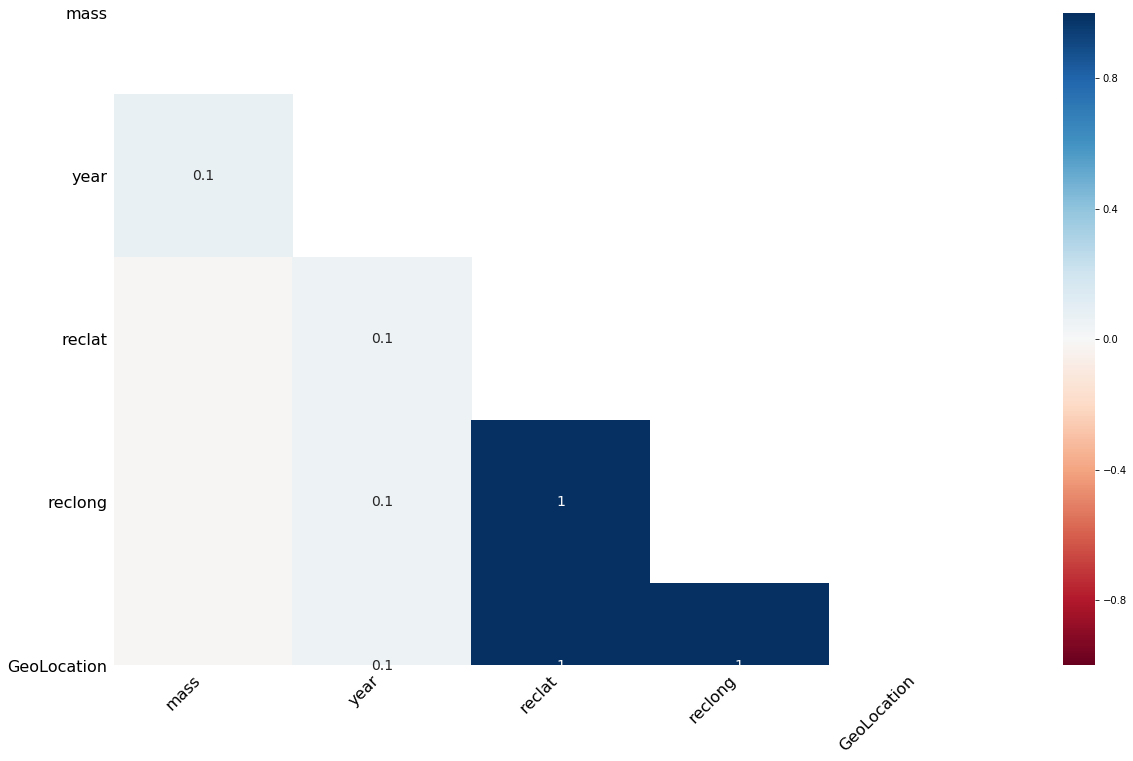

In [10]:
msno.heatmap(data)

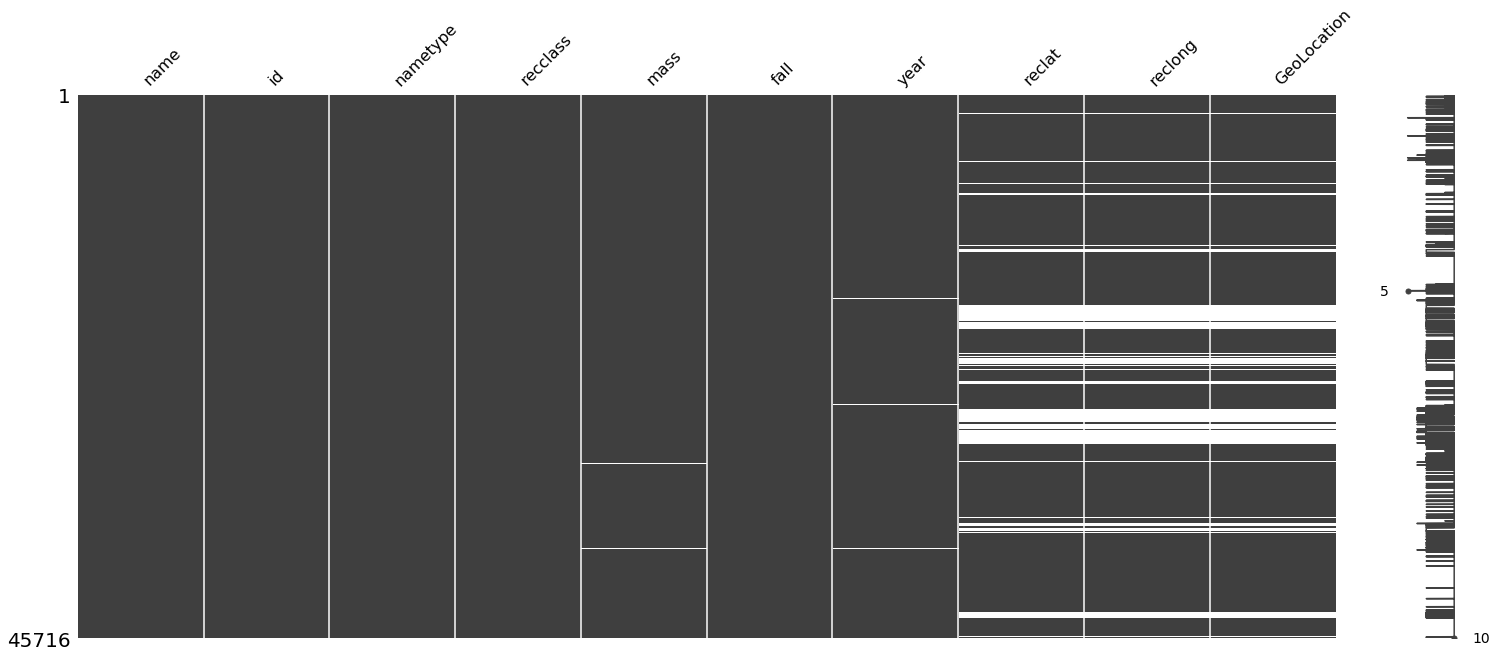

In [11]:
msno.matrix(data)

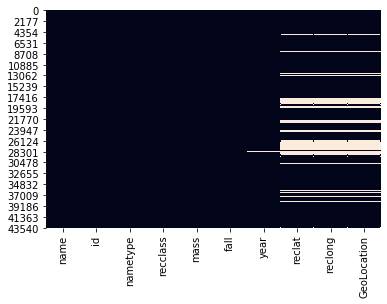

In [12]:
sns.heatmap(data.isnull(), cbar=False)

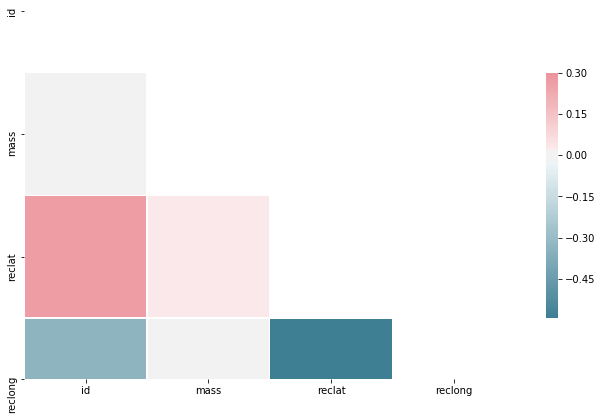

In [13]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
null_data = data[data.isnull().any(axis=1)]
null_data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,01/01/1769 12:00:00 AM,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,01/01/1822 12:00:00 AM,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,01/01/1704 12:00:00 AM,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,01/01/1937 12:00:00 AM,-32.33333,-64.86667,"(-32.33333, -64.86667)"
147,Bulls Run,5163,Valid,Iron?,2250.000,Fell,01/01/1964 12:00:00 AM,NaN,NaN,NaN
172,Castel Berardenga,5292,Valid,Stone-uncl,NaN,Fell,01/01/1791 12:00:00 AM,43.35000,11.50000,"(43.35, 11.5)"
204,Chitado,5356,Valid,L6,NaN,Fell,01/01/1966 12:00:00 AM,-17.35000,13.96667,"(-17.35, 13.96667)"
208,Clohars,5383,Valid,L4,48.600,Fell,01/01/1822 12:00:00 AM,NaN,NaN,NaN
262,Dunhua,7749,Valid,Stone-uncl,NaN,Fell,01/01/1976 12:00:00 AM,43.33333,128.25000,"(43.33333, 128.25)"


In [15]:
# Let X be an array containing missing values
from missingpy import KNNImputer
imputer = KNNImputer()
X_imputed = imputer.fit_transform(data[['reclong']])
data['reclong']=X_imputed

C:\Users\saran\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\saran\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']   #Selecting only numerical columns

newdf = data.select_dtypes(include=numerics)

columnsfill=[]
for col in data.select_dtypes(include=numerics).columns:
    columnsfill.append(col)


In [17]:
# Let X be an array containing missing values
from missingpy import KNNImputer
imputer = KNNImputer()
for i in columnsfill:
    X_imputed = imputer.fit_transform(data[[i]])
    data[i]=X_imputed

C:\Users\saran\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\saran\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))
C:\Users\saran\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\saran\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [18]:
data['GeoLocation'] = '('+round(data['reclat'],4).astype(str) + ',' + round(data['reclong'],4).astype(str)+')'   #Combining lat and long to form coordinate

In [19]:
null_data = data[data.isnull().any(axis=1)]
print(len(null_data))
null_data

291


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693.0,Valid,L5,256.800000,Found,NaN,0.00000,0.000000,"(0.0,0.0)"
1937,Cacilandia,5191.0,Valid,H6,13278.078549,Found,NaN,-39.12258,61.074319,"(-39.1226,61.0743)"
3431,Apache Junction,54566.0,Valid,"Iron, IIIAB",25000.000000,Found,NaN,33.45000,-111.516670,"(33.45,-111.5167)"
3462,Asarco Mexicana,2344.0,Valid,"Iron, IIIAB",13278.078549,Found,NaN,-39.12258,61.074319,"(-39.1226,61.0743)"
5008,Aus,4902.0,Valid,L,30.200000,Found,NaN,-26.66667,16.250000,"(-26.6667,16.25)"
5080,Benares (b),5012.0,Valid,Iron,13278.078549,Found,NaN,25.33333,83.000000,"(25.3333,83.0)"
5304,California,5199.0,Valid,"Iron, IAB-sLL",13278.078549,Found,NaN,-39.12258,61.074319,"(-39.1226,61.0743)"
5361,Camp Wood,51830.0,Valid,"Iron, IIIAB",148000.000000,Found,NaN,29.77250,-99.875000,"(29.7725,-99.875)"
5490,Cochabamba,5389.0,Valid,CM2,85.000000,Found,NaN,-39.12258,61.074319,"(-39.1226,61.0743)"
5516,Cook,5420.0,Valid,Unknown,13278.078549,Found,NaN,-39.12258,61.074319,"(-39.1226,61.0743)"


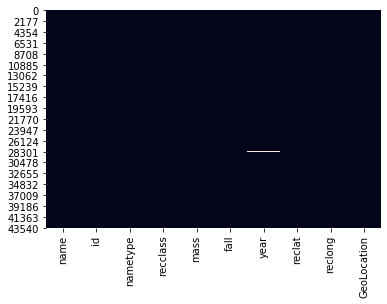

In [20]:
sns.heatmap(data.isnull(), cbar=False)

In [21]:
from sklearn.base import TransformerMixin
import numpy
class SeriesImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Imputes with the most frequent object.

        """
    def fit(self, X, y=None):
        if   X.dtype == numpy.dtype('O'): self.fill = X.value_counts().index[0]
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [22]:
#stringcol= [col for col in data.columns if type(data[col][0])==str]
#stringcol

In [24]:
a  = SeriesImputer()   # Initialize the imputer
a.fit(data['year'])              # Fit the imputer
data['year'] = a.transform(data['year'])   # Get a new series

In [25]:
null_data = data[data.isnull().any(axis=1)]
print(len(null_data))
null_data

0


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
